## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [1]:
# Installing the libraries with the specified version.
#pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV


# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier


# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Import Dataset

In [3]:
visa_data = pd.read_csv('/Users/sabinpc/Library/Mobile Documents/com~apple~CloudDocs/Documents/AI-learning Repositories/PG AI-ML/Advanced ML/Project/EasyVisa/data/raw/EasyVisa.csv')

In [4]:
# copy the data
df = visa_data.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [5]:
#first 5 rows
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
#last 5 rows
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [7]:
# shape of the dataset
df.shape

(25480, 12)

* There are 25480 rows and 12 columns in the dataset.

In [8]:
# checking for missing values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no missing values in the dataset

In [9]:
# checking for duplicate values
df.duplicated().sum()

0

* There are no duplicate values in the dataset

#### Check the data types of the columns for the dataset

In [10]:
# checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* There are 9 columns with datatype Object, 1 with float and 2 with int
* The target variable is case_status
* case_id is a primary key which should not have any relevance for analysis and modeling

In [11]:
# dropping the case_id column as it is not relevant for analysis and modeling
df = df.drop(columns=['case_id'])

In [12]:
# convert all columns with dtype object into category
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [13]:
# statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


* There are negative values in the no_of_employees column, which will require some kind of treatment.
* The prevailing_wage data is skewed necase there is a minimum value of $2 and max of $319210
* The range of yr_of_estab is big with oldest company established at 1800 and recent one is 2016.

#### Fixing the negative values in number of employees columns

In [14]:
# Check how many negative values are there in the no_of_employees column
df[df['no_of_employees'] < 0].shape

(33, 11)

* There are 33 negative values of no_of_employees

In [15]:
# fixing the negative values in no_of_employees column using the absolute value for number of employees
df['no_of_employees'] = abs(df['no_of_employees'])

In [16]:
# confirming the negative values are fixed
df[df['no_of_employees'] < 0].shape

(0, 11)

#### Let's check the count of each unique category in each of the categorical variables

In [17]:
# count of each unique category in each of the categorical variables
df.nunique()

continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [18]:
# Printing number of count of each unique value in each column
for col in df.columns:
    print(df[col].value_counts())
    print("-" * 50)


continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
no_of_employees
183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      1
40224     1
Name: count, Length: 7105, dtype: int64
--------------------------------------------------
yr_of_estab
1998    1134
2005    1051
2001    1017
2007     994
1999     870
        ... 
1842       6
1846       

### Univariate Analysis

In [19]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

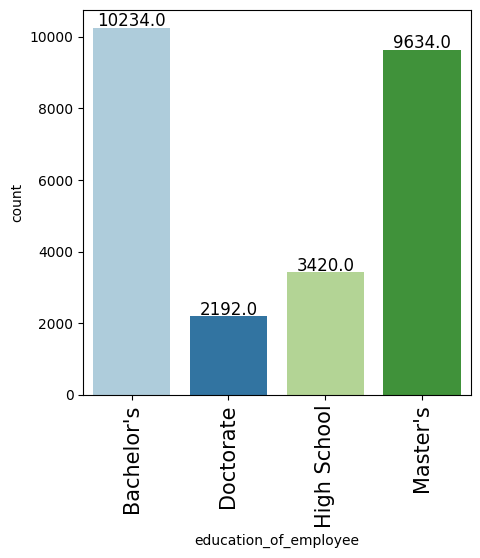

In [21]:
# observing the distribution of education of employee
labeled_barplot(df, 'education_of_employee')


#### Observations on region of employment

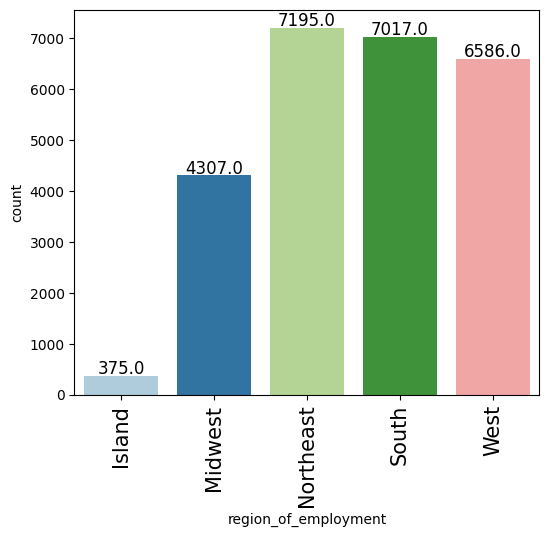

In [22]:
labeled_barplot(df, 'region_of_employment')

#### Observations on job experience

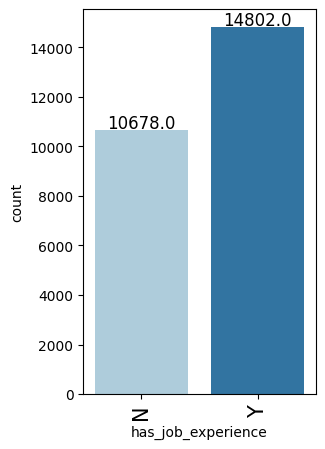

In [23]:
labeled_barplot(df, 'has_job_experience')

#### Observations on case status

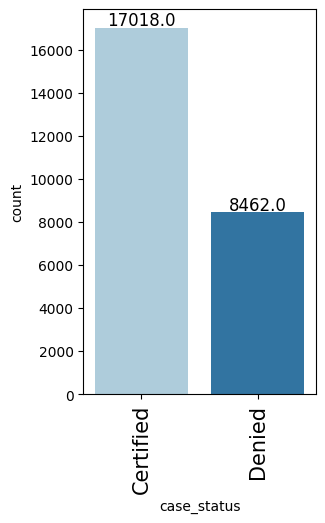

In [24]:
labeled_barplot(df, 'case_status')

#### Observations from EDA and Univariate Analysis
* Case ID is not significant for model building, so dropped the column
* Out of 6 represented continent, the most are from Asia
* Highest number of applicant have the bachelor's degree while Doctorates are least common
* Majority of applicants do not require job training
* Most have certified case status
* Most common wage unit is yearly
* Majority of applicants have job experience

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [25]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [26]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


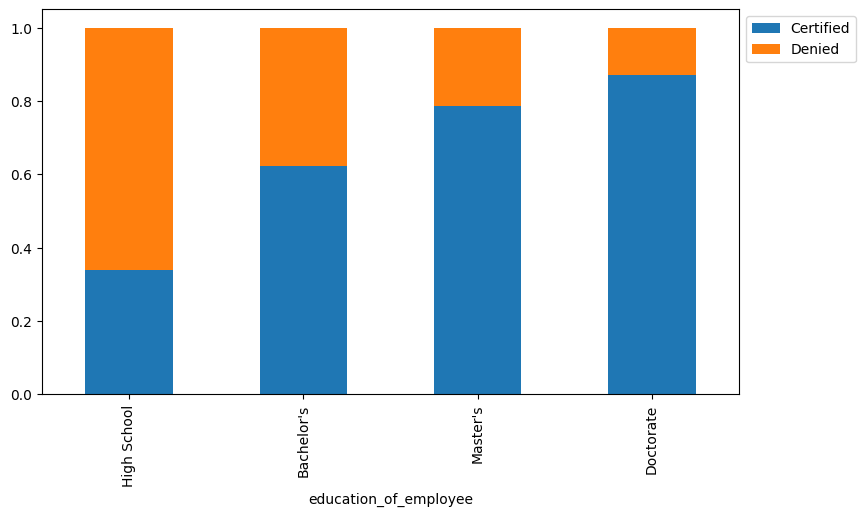

In [27]:
# Education of employee vs visa status with percentage
stacked_barplot(df, 'education_of_employee', 'case_status')


* Education definitely matters in the visa case being certified. As we can see higher the degree, highly likelihood that the case is certified.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


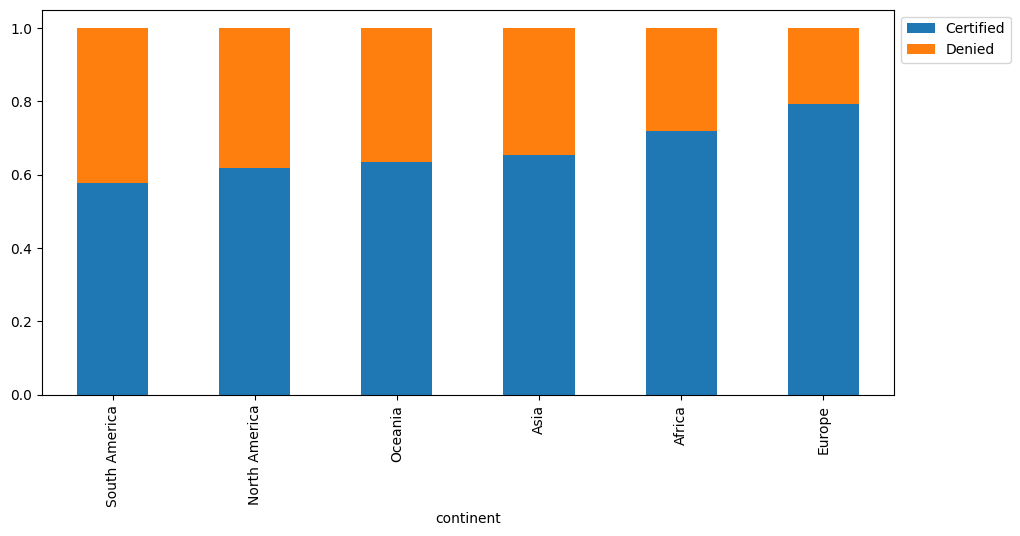

In [28]:
#Continent vs visa status
stacked_barplot(df, 'continent', 'case_status')


* Candidates from Europe has high likelihood of case being certified
* Although there are few difference, the distibution seems fairly disributed acorss all continents when it comes to visa case being certified.
* Asia has the highest number of applicants.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


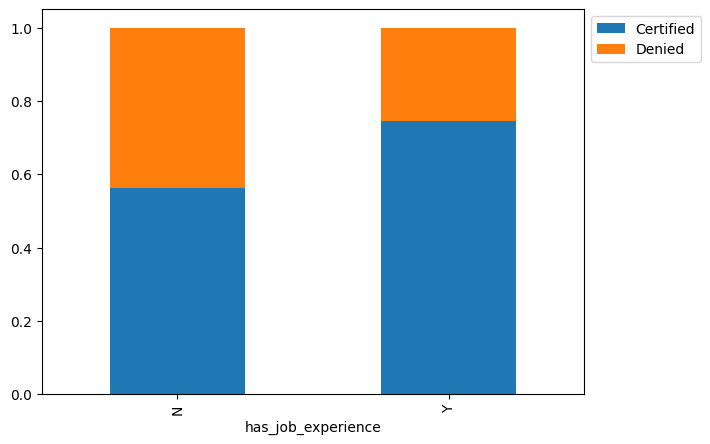

In [29]:
# work experience vs visa status
stacked_barplot(df, 'has_job_experience', 'case_status')


* Candidates with job experience have higher likelihood of case being certified

#### Checking if the prevailing wage is similar across all the regions of the US

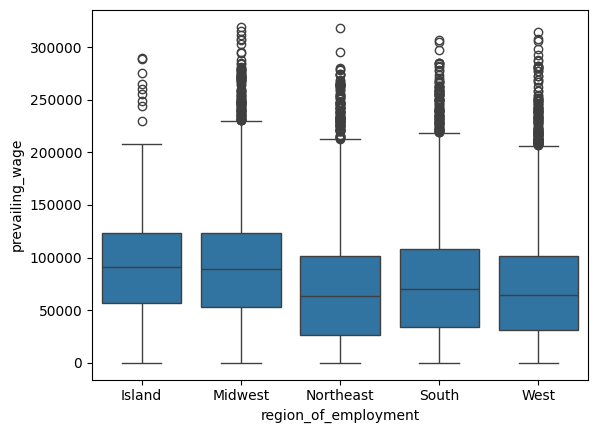

In [30]:
# prevailing wage vs region of employment using boxplot
sns.boxplot(data=df, x='region_of_employment', y='prevailing_wage')
plt.show()

* There is no significant difference in prevailing wage across all the regions of the US

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

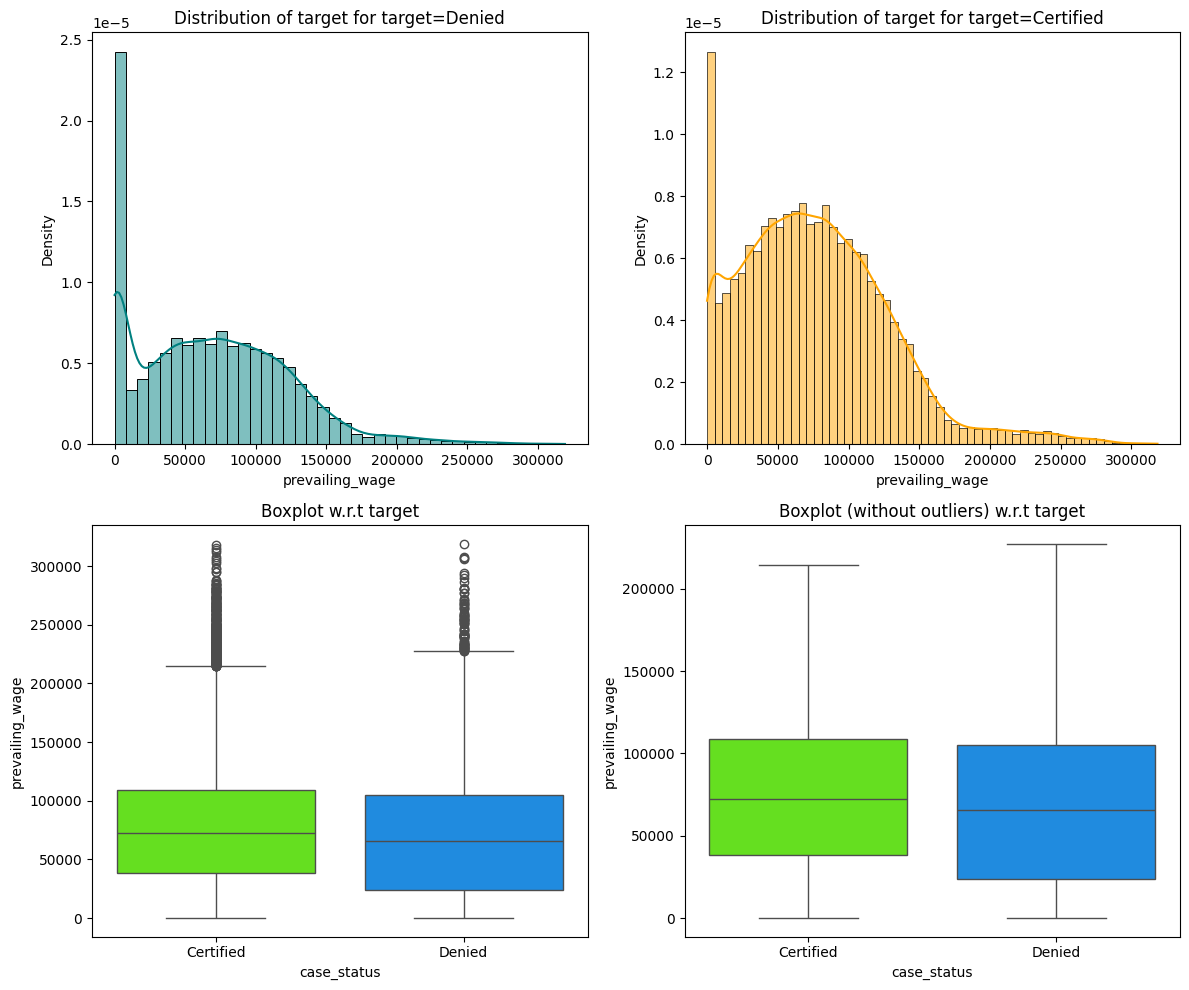

In [31]:
# prevailing wage vs visa status using distribution plot
distribution_plot_wrt_target(df, 'prevailing_wage', 'case_status')


* The distribution with our without target is fairly similar for both denied and certified cases, showing left-skewed data.

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


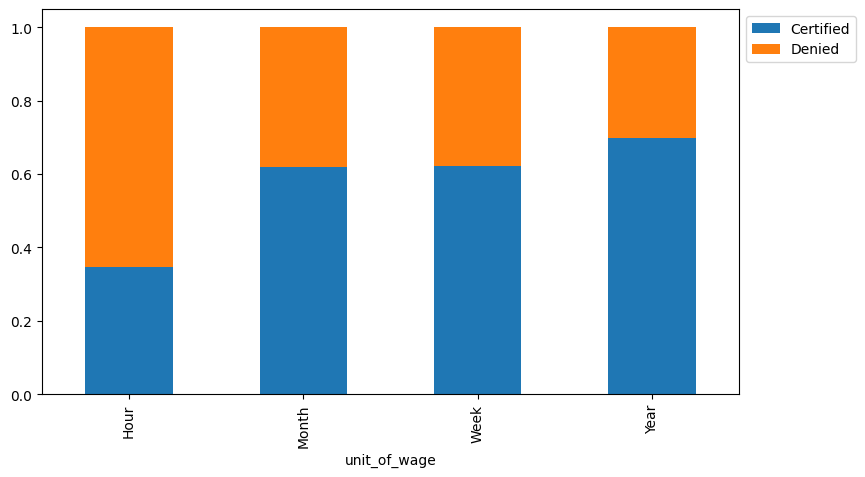

In [32]:
# prevailing wage unit vs visa status using stacked barplot
stacked_barplot(df, 'unit_of_wage', 'case_status')

* Most cases submitted and that are certified are from annual wage category
* The approval rates for hourly, monthly and weekly is pretty similar around 2:1

## Data Pre-processing

### Feature Engineering

In [33]:
#yr_of_estab is an integer but it is not a continuous variable. 
# It is a categorical variable. We need to get the accurate number. 
# We will drop this column and create a new column that calcualte how old the company is.
df['company_age'] = 2025 - df['yr_of_estab']
df = df.drop(columns=['yr_of_estab'])
df.head()


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


In [34]:
#Let's encode the Y/N fields into 1/0 and convert to int
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0) 
df['has_job_experience'] = df['has_job_experience'].apply(lambda x: 1 if x == 'Y' else 0)
df['requires_job_training'] = df['requires_job_training'].apply(lambda x: 1 if x == 'Y' else 0)
df['full_time_position'] = df['full_time_position'].apply(lambda x: 1 if x == 'Y' else 0)


#convert the encode binary columns to int
df['case_status'] = df['case_status'].astype(int)
df['has_job_experience'] = df['has_job_experience'].astype(int)
df['requires_job_training'] = df['requires_job_training'].astype(int)
df['full_time_position'] = df['full_time_position'].astype(int)



In [35]:
#check to see if enconding worked
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,0,0,14513,West,592.2029,Hour,1,0,18
1,Asia,Master's,1,0,2412,Northeast,83425.6500,Year,1,1,23
2,Asia,Bachelor's,0,1,44444,West,122996.8600,Year,1,0,17
3,Asia,Bachelor's,0,0,98,West,83434.0300,Year,1,0,128
4,Africa,Master's,1,0,1082,South,149907.3900,Year,1,1,20


In [36]:
#confirming dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  int64   
 3   requires_job_training  25480 non-null  int64   
 4   no_of_employees        25480 non-null  int64   
 5   region_of_employment   25480 non-null  category
 6   prevailing_wage        25480 non-null  float64 
 7   unit_of_wage           25480 non-null  category
 8   full_time_position     25480 non-null  int64   
 9   case_status            25480 non-null  int64   
 10  company_age            25480 non-null  int64   
dtypes: category(4), float64(1), int64(6)
memory usage: 1.5 MB


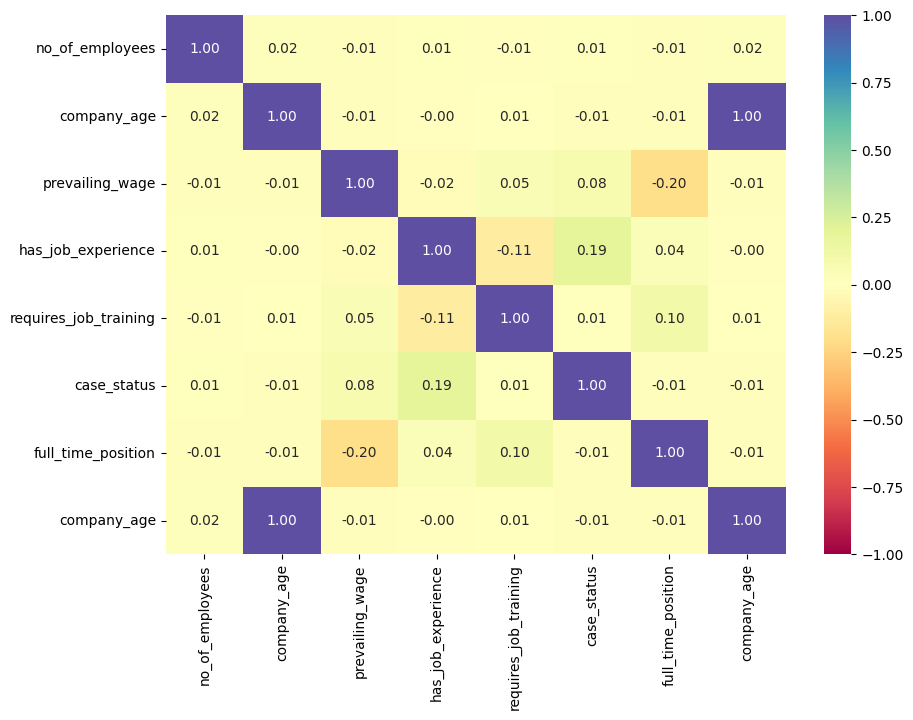

In [37]:
#correlation matrix for numeric columns
cols_list = ['no_of_employees', 'company_age', 'prevailing_wage','has_job_experience','requires_job_training','case_status', 'full_time_position','company_age']

plt.figure(figsize=(10, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Moderate Positive Correlation with Job Experience: The has_job_experience feature shows a moderate positive correlation (0.19) with case_status, indicating that applicants with job experience have a slightly higher likelihood of getting their visa certified.
* Weak Correlations with Other Features: Most other numerical features show very weak correlations (close to 0) with case_status, while prevailing_wage have minimal direct linear relationship with visa certification outcomes.

### Outlier Check

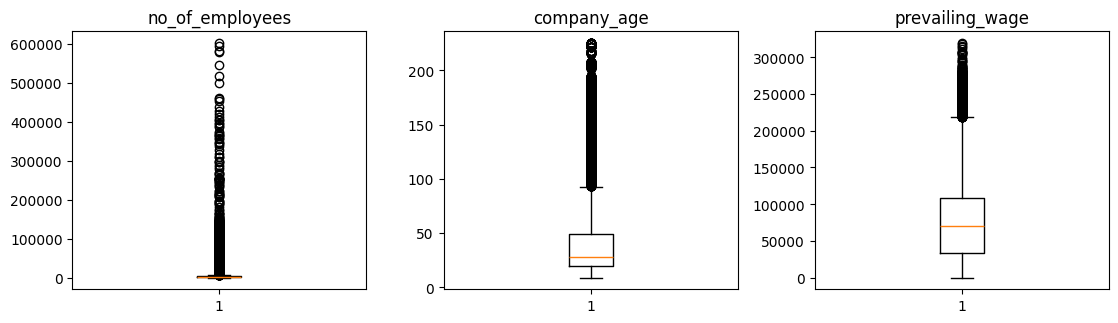

In [38]:
# outlier check using boxplot for all numeric columns
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['no_of_employees','company_age','prevailing_wage']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


* There are outliers in all numerical columns in this dataset
* Since there are so many outliers, we will leave it as-is as this will be valuable in modeling

### Data Preparation for modeling

In [39]:
# model preparation
X = df.drop(["case_status"], axis=1) # preparing independent variables
y = df["case_status"]# preparing target variable


In [40]:
# using hot encoding for categorical variables for the features and not on all dataset
X = pd.get_dummies(X, columns=X.select_dtypes(include=["category"]).columns.tolist(), drop_first=True)
X = X.astype(int)


In [41]:
X.head()

,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,...,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0,0,14513,592,1,18,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,2412,83425,1,23,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,44444,122996,1,17,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,98,83434,1,128,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,1082,149907,1,20,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


* After all the feature engineering and encoding, we have 21 columns

In [42]:
# splitting the data into training and validation and testsets
# first we split data into 2 parts - say training and validation at 70/30 split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# then we split the validatoin and test set at 80/20 split

X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=0.2, random_state=1, stratify=y_val
)
print(X_train.shape, X_val.shape, X_test.shape)


(17836, 21) (6115, 21) (1529, 21)


#### `Train Dataset`

In [43]:
for column in X_train.columns:
    print(f"\n{column}")
    print(X_train[column].value_counts())
    print("*" * 30)


has_job_experience
has_job_experience
1    10367
0     7469
Name: count, dtype: int64
******************************

requires_job_training
requires_job_training
0    15731
1     2105
Name: count, dtype: int64
******************************

no_of_employees
no_of_employees
183      14
854      12
766      12
878      12
1476     12
         ..
1199      1
28315     1
34236     1
17838     1
4756      1
Name: count, Length: 6266, dtype: int64
******************************

prevailing_wage
prevailing_wage
102       12
100       11
101       10
111        9
109        8
          ..
147492     1
94589      1
26064      1
52550      1
117715     1
Name: count, Length: 16263, dtype: int64
******************************

full_time_position
full_time_position
1    15967
0     1869
Name: count, dtype: int64
******************************

company_age
company_age
27     807
20     741
24     716
18     711
19     602
      ... 
203      3
215      1
195      1
165      1
201      1
Name: coun

#### `Validation Dataset`

In [44]:
for column in X_val.columns:
    print(f"\n{column}")
    print(X_val[column].value_counts())
    print("*" * 30)


has_job_experience
has_job_experience
1    3557
0    2558
Name: count, dtype: int64
******************************

requires_job_training
requires_job_training
0    5445
1     670
Name: count, dtype: int64
******************************

no_of_employees
no_of_employees
683     7
1441    7
1829    6
845     6
368     6
       ..
3104    1
4456    1
2608    1
998     1
2217    1
Name: count, Length: 3812, dtype: int64
******************************

prevailing_wage
prevailing_wage
104       7
101       6
100       6
128       5
118       5
         ..
129628    1
72802     1
110050    1
86665     1
47639     1
Name: count, Length: 5878, dtype: int64
******************************

full_time_position
full_time_position
1    5455
0     660
Name: count, dtype: int64
******************************

company_age
company_age
27     270
20     244
24     236
18     235
26     228
      ... 
201      1
203      1
189      1
193      1
183      1
Name: count, Length: 195, dtype: int64
***********

#### `Test Dataset`

In [45]:
for column in X_test.columns:
    print(f"\n{column}")
    print(X_test[column].value_counts())
    print("*" * 30)


has_job_experience
has_job_experience
1    878
0    651
Name: count, dtype: int64
******************************

requires_job_training
requires_job_training
0    1349
1     180
Name: count, dtype: int64
******************************

no_of_employees
no_of_employees
1187    4
2921    4
304     3
724     3
2066    3
       ..
429     1
59      1
2294    1
4329    1
1227    1
Name: count, Length: 1345, dtype: int64
******************************

prevailing_wage
prevailing_wage
109       3
100       2
72681     2
902       2
631       2
         ..
120169    1
141099    1
9054      1
61069     1
31321     1
Name: count, Length: 1513, dtype: int64
******************************

full_time_position
full_time_position
1    1351
0     178
Name: count, dtype: int64
******************************

company_age
company_age
21     68
20     66
24     65
27     57
17     53
       ..
162     1
84      1
188     1
171     1
89      1
Name: count, Length: 167, dtype: int64
************************

## Model Building

### Model Evaluation Criterion

#### What are we trying to do?
* We are trying to predict if a applicant's visa will be approved or denied.
* Visa applications are time sensitive things and for efficient process, it is better to prioritize applicants who have the highest likelihood of case being certified. Hence we need to minimize false positives and false negatives. Accuracy will be key but also we cannot make mistakes.
* Based on the EDA, we know that the data is imblanaced with Certified - 17018 and Denied     8462 Cases. Hence, f1_score can be used for evaluating the model as it may present the balance approach.

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [47]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [48]:
#Adding this function becuase everytime we are buidling the models for original, oversampled and undersampled, 
# there were repeated codes.
def evaluate_models(
    X_train, y_train, X_val, y_val, models, scorer, cv, 
    show_confusion_matrix=False, show_comparison=True
):
    """
    Trains, cross-validates, and evaluates a list of models.
    Prints F1 scores and (optionally) confusion matrix for each model.
    Returns a DataFrame with CV mean and validation scores.
    """
    cv_results = {}
    val_scores = {}
    
    for name, model in models:
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer)
        cv_results[name] = cv_scores
        
        # Fit and validate
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        val_f1 = f1_score(y_val, y_pred)
        val_scores[name] = val_f1
        
        print(f"{name} - CV Mean F1: {cv_scores.mean():.3f}, Validation F1: {val_f1:.3f}")
        
        if show_confusion_matrix:
            cm = confusion_matrix(y_val, y_pred)
            plt.figure(figsize=(4,3))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
            plt.title(f"Confusion Matrix: {name}")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.show()
    
    # Create summary DataFrame
    summary = pd.DataFrame({
        'Model': list(cv_results.keys()),
        'CV Mean F1': [scores.mean() for scores in cv_results.values()],
        'Validation F1': [val_scores[name] for name in cv_results.keys()]
    })
    
    # Add difference column
    summary['Difference'] = abs(summary['CV Mean F1'] - summary['Validation F1'])
    
    if show_comparison:
        print("\nDetailed Comparison of CV Mean and Validation Scores:")
        print("-" * 80)
        print(f"{'Model':<15} {'CV Mean F1':<12} {'Validation F1':<12} {'Difference':<12}")
        print("-" * 80)
        for _, row in summary.iterrows():
            print(f"{row['Model']:<15} {row['CV Mean F1']:<12.3f} {row['Validation F1']:<12.3f} {row['Difference']:<12.3f}")
    
    return summary

#### Defining scorer to be used for cross-validation and hyperparameter tuning


In [49]:
scorer = make_scorer(f1_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [50]:
# Initialize 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Initialize models for cross-validation
cv_models = []
cv_models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
cv_models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
cv_models.append(("GBM", GradientBoostingClassifier(random_state=1)))
cv_models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
cv_models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
cv_models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))



Bagging - CV Mean F1: 0.780, Validation F1: 0.775


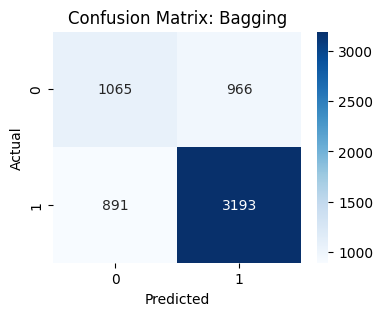

Random forest - CV Mean F1: 0.805, Validation F1: 0.804


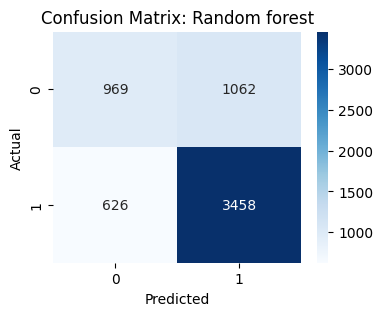

GBM - CV Mean F1: 0.823, Validation F1: 0.820


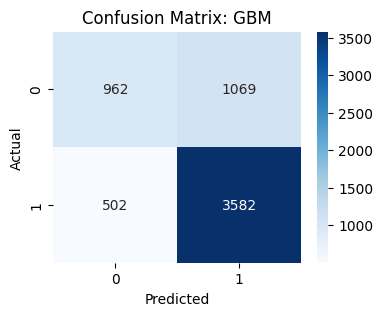

Adaboost - CV Mean F1: 0.820, Validation F1: 0.816


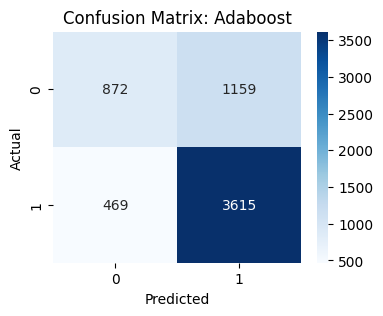

Xgboost - CV Mean F1: 0.809, Validation F1: 0.809


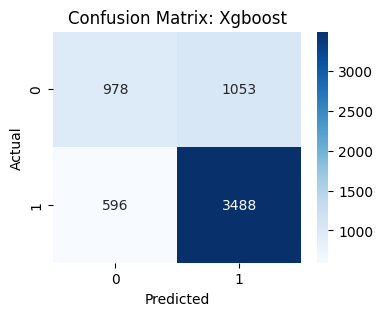

dtree - CV Mean F1: 0.746, Validation F1: 0.744


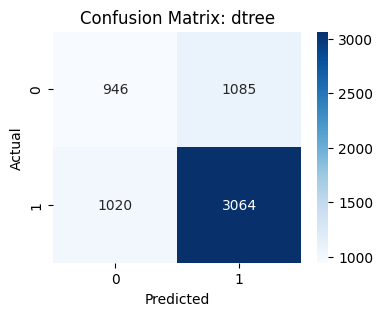


Detailed Comparison of CV Mean and Validation Scores:
--------------------------------------------------------------------------------
Model           CV Mean F1   Validation F1 Difference  
--------------------------------------------------------------------------------
Bagging         0.780        0.775        0.005       
Random forest   0.805        0.804        0.001       
GBM             0.823        0.820        0.003       
Adaboost        0.820        0.816        0.004       
Xgboost         0.809        0.809        0.000       
dtree           0.746        0.744        0.002       


In [51]:
summary_original = evaluate_models(
    X_train, y_train, X_val, y_val, cv_models, scorer, cv, 
    show_confusion_matrix=True, show_comparison=True
)

* GBM: Best performer with minimal difference (0.003) and higher f1_score
* Adaboost: Second best with very stable performance (difference of 0.004)
* XGBoost: Third best with excellent consistency (no difference)
* Random Forest: Good performance with high stability (difference of 0.001)
* Bagging: Slightly lower performance but still stable (difference of 0.005)
* Decision Tree: Lowest performance but very consistent (difference of 0.002)

### Model Building with oversampled data

In [52]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 11913
Before Oversampling, counts of label 'No': 5923 

After Oversampling, counts of label 'Yes': 11913
After Oversampling, counts of label 'No': 11913 

After Oversampling, the shape of train_X: (23826, 21)
After Oversampling, the shape of train_y: (23826,) 



In [53]:
# Initialize 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Initialize models for cross-validation
cv_models = []
cv_models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
cv_models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
cv_models.append(("GBM", GradientBoostingClassifier(random_state=1)))
cv_models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
cv_models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
cv_models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))




Bagging - CV Mean F1: 0.762, Validation F1: 0.760


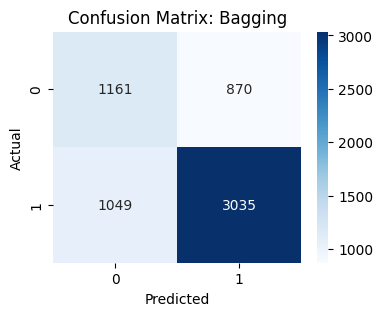

Random forest - CV Mean F1: 0.792, Validation F1: 0.791


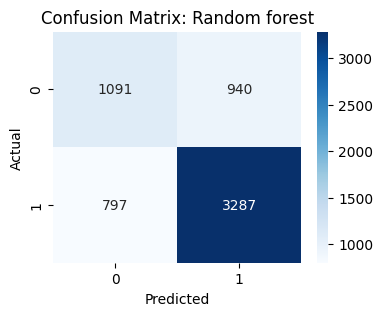

GBM - CV Mean F1: 0.800, Validation F1: 0.801


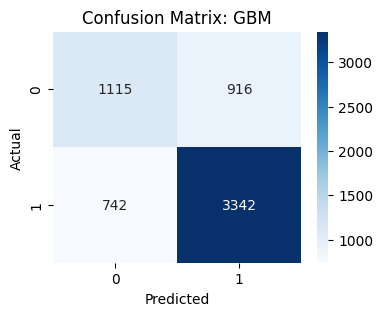

Adaboost - CV Mean F1: 0.770, Validation F1: 0.776


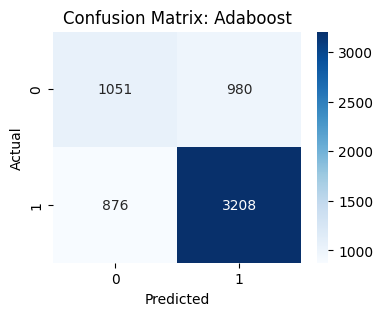

Xgboost - CV Mean F1: 0.795, Validation F1: 0.801


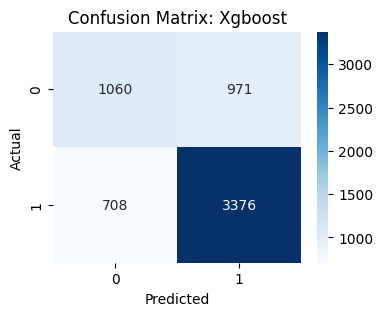

dtree - CV Mean F1: 0.732, Validation F1: 0.740


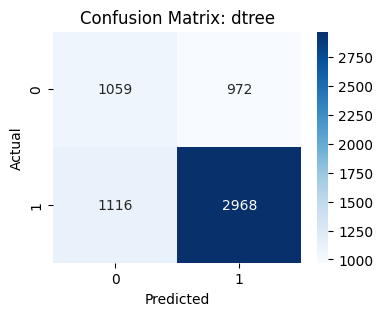


Detailed Comparison of CV Mean and Validation Scores:
--------------------------------------------------------------------------------
Model           CV Mean F1   Validation F1 Difference  
--------------------------------------------------------------------------------
Bagging         0.762        0.760        0.002       
Random forest   0.792        0.791        0.001       
GBM             0.800        0.801        0.001       
Adaboost        0.770        0.776        0.006       
Xgboost         0.795        0.801        0.006       
dtree           0.732        0.740        0.008       


In [54]:
summary_over = evaluate_models(
    X_train_over, y_train_over, X_val, y_val, cv_models, scorer, cv, 
    show_confusion_matrix=True, show_comparison=True
)

* GBM is the best performer with high validation score and minimal difference
* Random Forest is the second best 
* Xgboost is the third best, just beause it is slight more difference than RF.

### Model Building with undersampled data

In [55]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [56]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 11913
Before Under Sampling, counts of label 'No': 5923 

After Under Sampling, counts of label 'Yes': 5923
After Under Sampling, counts of label 'No': 5923 

After Under Sampling, the shape of train_X: (11846, 21)
After Under Sampling, the shape of train_y: (11846,) 



In [57]:
# Initialize 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Initialize models for cross-validation
cv_models = []
cv_models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
cv_models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
cv_models.append(("GBM", GradientBoostingClassifier(random_state=1)))
cv_models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
cv_models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
cv_models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))




Bagging - CV Mean F1: 0.647, Validation F1: 0.689


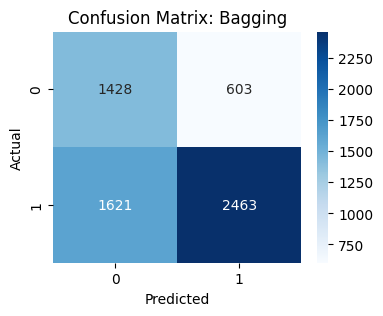

Random forest - CV Mean F1: 0.690, Validation F1: 0.733


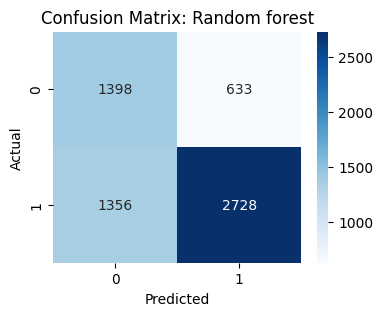

GBM - CV Mean F1: 0.712, Validation F1: 0.764


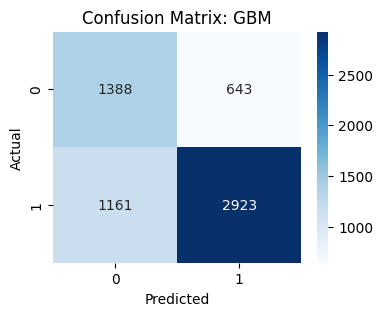

Adaboost - CV Mean F1: 0.696, Validation F1: 0.763


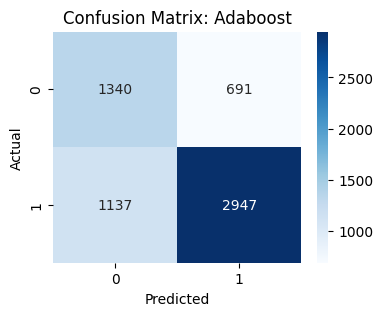

Xgboost - CV Mean F1: 0.688, Validation F1: 0.748


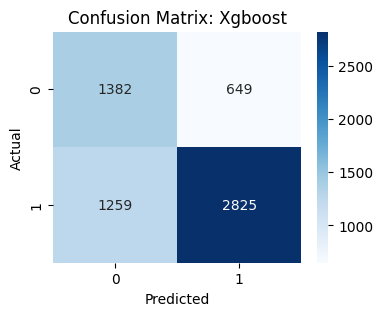

dtree - CV Mean F1: 0.620, Validation F1: 0.680


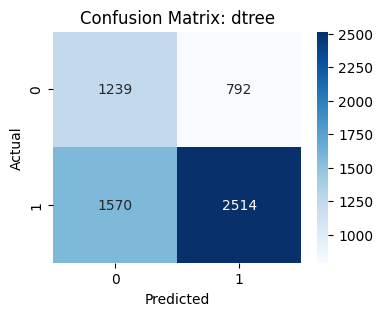


Detailed Comparison of CV Mean and Validation Scores:
--------------------------------------------------------------------------------
Model           CV Mean F1   Validation F1 Difference  
--------------------------------------------------------------------------------
Bagging         0.647        0.689        0.041       
Random forest   0.690        0.733        0.042       
GBM             0.712        0.764        0.052       
Adaboost        0.696        0.763        0.067       
Xgboost         0.688        0.748        0.060       
dtree           0.620        0.680        0.060       


In [58]:
# For undersampled data
summary_under = evaluate_models(
    X_train_un, y_train_un, X_val, y_val, cv_models, scorer, cv, 
    show_confusion_matrix=True, show_comparison=True
)

### Observation from Model Building with Original, Over sample and Under sampled data



Performance Comparison:
- Oversampled data consistently shows the best performance across all models
- GBM consistently performs best across all three approaches
- Original data shows the lowest performance
- Example: GBM validation scores - Oversampled (0.820) > Undersampled (0.764) > Original (0.777)
 
Model Stability:
- Oversampled models show the most stability (smallest differences between CV and validation)
- Undersampled models show larger differences between CV and validation
- Original data shows moderate stability

Top 3 Models Across All Approaches:
- GBM: Best performer in all three approaches
- Random Forest: Consistent second-best performer
- XGBoost: Strong third performer with good stability

## Hyperparameter Tuning

* We are ging to use oversampled data for tuning and will use GBM, RandomForest, XGboost, and Adaboost

### Tuning Gradient Boosting model with Over Sampled Data

In [62]:
%%time

#defining model
gbm_model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
gbm_param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
        estimator=gbm_model,
        param_distributions=gbm_param_grid,
        n_iter=50,
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        random_state=1
    )

#fitting
random_search.fit(X_train_over, y_train_over)
    

CPU times: user 16.8 s, sys: 2.42 s, total: 19.2 s
Wall time: 4min 39s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [63]:
print(random_search.best_params_)
print(random_search.best_score_)

# Evaluation
gbm_best_model = random_search.best_estimator_
gbm_best_model

gbm_best_model_performance_train = model_performance_classification_sklearn(gbm_best_model, X_train_over, y_train_over)
gbm_best_model_performance_train

gbm_best_model_performance_val = model_performance_classification_sklearn(gbm_best_model, X_val, y_val)
gbm_best_model_performance_val

{'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 6, 'learning_rate': 0.01}
0.8041711361468418


,Accuracy,Recall,Precision,F1
0,0.734096,0.822968,0.788227,0.805223


### Tuning Random Forest with Over Sampled Data

In [82]:
%%time

#defining model
rf_model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
rf_param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5,10,15,20],
    'min_samples_split': [10,15,20],
    'min_samples_leaf': [5,8,10],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions=rf_param_grid,
        n_iter=50,
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        random_state=1
    )

#fitting
random_search.fit(X_train_over, y_train_over)
    

CPU times: user 5.54 s, sys: 2.08 s, total: 7.62 s
Wall time: 2min 24s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(random_state=1), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [5, 8, 10],
                                        'min_samples_split': [10, 15, 20],
                                        'n_estimators': [100, 150, 200]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [83]:
print(random_search.best_params_)
print(random_search.best_score_)

# Evaluation
rf_best_model = random_search.best_estimator_
rf_best_model

rf_best_model_performance_train = model_performance_classification_sklearn(rf_best_model, X_train_over, y_train_over)
rf_best_model_performance_train

rf_best_model_performance_val = model_performance_classification_sklearn(rf_best_model, X_val, y_val)
rf_best_model_performance_val

{'n_estimators': 150, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 20}
0.802622938909467


,Accuracy,Recall,Precision,F1
0,0.73148,0.822233,0.785681,0.803542


### Tuning XGBoost with Over Sampled Data

In [66]:
%%time

#defining model
xgb_model = XGBClassifier(random_state=1, eval_metric="logloss")

#Parameter grid to pass in RandomSearchCV
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2]
}

random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=xgb_param_grid,
        n_iter=50,
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        random_state=1
    )

#fitting
random_search.fit(X_train_over, y_train_over)
    

CPU times: user 3.34 s, sys: 1.89 s, total: 5.22 s
Wall time: 44.2 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [67]:
print(random_search.best_params_)
print(random_search.best_score_)

# Evaluation
xgb_best_model = random_search.best_estimator_
xgb_best_model

xgb_best_model_performance_train = model_performance_classification_sklearn(xgb_best_model, X_train_over, y_train_over)
xgb_best_model_performance_train

xgb_best_model_performance_val = model_performance_classification_sklearn(xgb_best_model, X_val, y_val)
xgb_best_model_performance_val

{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'gamma': 0.1, 'colsample_bytree': 0.7}
0.8001233997499035


,Accuracy,Recall,Precision,F1
0,0.726247,0.820519,0.780755,0.800143


### Tuning AdaBoost with Over Sampled Data

In [69]:
%%time

#defining model
ada_model = AdaBoostClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
ada_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'estimator': [DecisionTreeClassifier(max_depth=1), 
                      DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)]
}

random_search = RandomizedSearchCV(
        estimator=ada_model,
        param_distributions=ada_param_grid,
        n_iter=50,
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        random_state=1
    )

#fitting
random_search.fit(X_train_over, y_train_over)
    

CPU times: user 12.2 s, sys: 2.24 s, total: 14.4 s
Wall time: 4min 35s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=AdaBoostClassifier(random_state=1), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1),
                                                      DecisionTreeClassifier(max_depth=2),
                                                      DecisionTreeClassifier(max_depth=3)],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [70]:
print(random_search.best_params_)
print(random_search.best_score_)

# Evaluation
ada_best_model = random_search.best_estimator_
ada_best_model

ada_best_model_performance_train = model_performance_classification_sklearn(ada_best_model, X_train_over, y_train_over)
ada_best_model_performance_train

ada_best_model_performance_val = model_performance_classification_sklearn(ada_best_model, X_val, y_val)
ada_best_model_performance_val

{'n_estimators': 300, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3)}
0.8000964890627744


,Accuracy,Recall,Precision,F1
0,0.728536,0.824437,0.781206,0.80224


## Model Performances

In [84]:
# let's compare all the tuned models for training performance and validation performance
performance_df_training = pd.concat(
    [
        gbm_best_model_performance_train.T, 
        rf_best_model_performance_train.T, 
        xgb_best_model_performance_train.T, 
        ada_best_model_performance_train.T, 
    ],
    axis=1
)
performance_df_validation = pd.concat(
    [
        gbm_best_model_performance_val.T, 
        rf_best_model_performance_val.T, 
        xgb_best_model_performance_val.T, 
        ada_best_model_performance_val.T, 
    ],
    axis=1
)


performance_df_training.columns = [
    "Gradient Boosting tuned",
    "Random forest tuned",
    "XGBoost tuned",
    "AdaBoost tuned",
]

performance_df_validation.columns = [
    "Gradient Boosting tuned",
    "Random forest tuned",
    "XGBoost tuned",
    "AdaBoost tuned",
]

print("Performance Comparison of Training Tuned Models:")
print(performance_df_training)

print("Performance Comparison of Validation Tuned Models:")
print(performance_df_validation)



Performance Comparison of Training Tuned Models:
           Gradient Boosting tuned  Random forest tuned  XGBoost tuned  \
Accuracy                  0.811592             0.837740       0.813271   
Recall                    0.835558             0.867036       0.839251   
Precision                 0.797341             0.819047       0.797798   
F1                        0.816002             0.842359       0.818000   

           AdaBoost tuned  
Accuracy         0.797322  
Recall           0.825233  
Precision        0.781603  
F1               0.802826  
Performance Comparison of Validation Tuned Models:
           Gradient Boosting tuned  Random forest tuned  XGBoost tuned  \
Accuracy                  0.734096             0.731480       0.726247   
Recall                    0.822968             0.822233       0.820519   
Precision                 0.788227             0.785681       0.780755   
F1                        0.805223             0.803542       0.800143   

           AdaBoos

#### Observation and Analysis:
Gradient Boosting shows the best validation performance:
 - Highest validation F1 score (0.805)
 - Highest validation accuracy (0.734)
 - Most balanced performance between training and validation sets
 - Smallest gap between training and validation metrics

In [86]:
final_picked_model = gbm_best_model

In [87]:
#now we will test the final picked model on the test set
test_data = model_performance_classification_sklearn(final_picked_model, X_test, y_test)
test_data

,Accuracy,Recall,Precision,F1
0,0.739699,0.813908,0.799808,0.806796


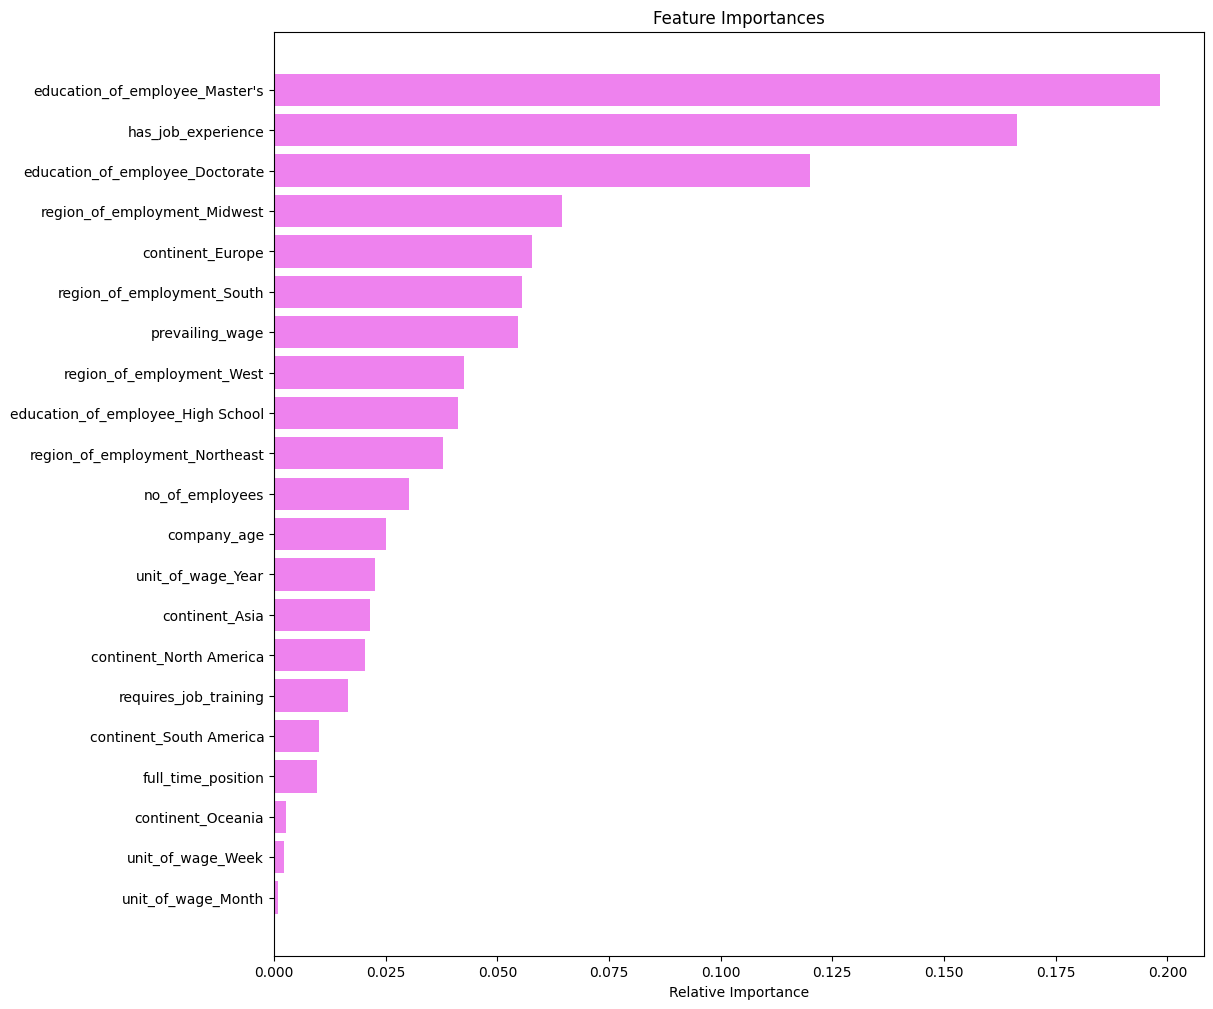

In [89]:
#let's check the feature importance of the final picked model

features = X_train.columns
importances  = final_picked_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## Actionable Insights and Recommendations

<font size=6 color='blue'>Power Ahead</font>
___